# Principal Component Analysis and Dimensionality Reduction of Cars Data

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [11]:
# Loading data & drop unnecessary columns
file_path = './dataset/auto-mpg.csv'
data = pd.read_csv(file_path, usecols=['mpg', 'horsepower'], nrows=200)
print(data)

      mpg  horsepower
0    18.0         130
1    15.0         165
2    18.0         150
3    16.0         150
4    17.0         140
..    ...         ...
195  29.0          52
196  24.5          60
197  29.0          70
198  33.0          53
199  20.0         100

[200 rows x 2 columns]


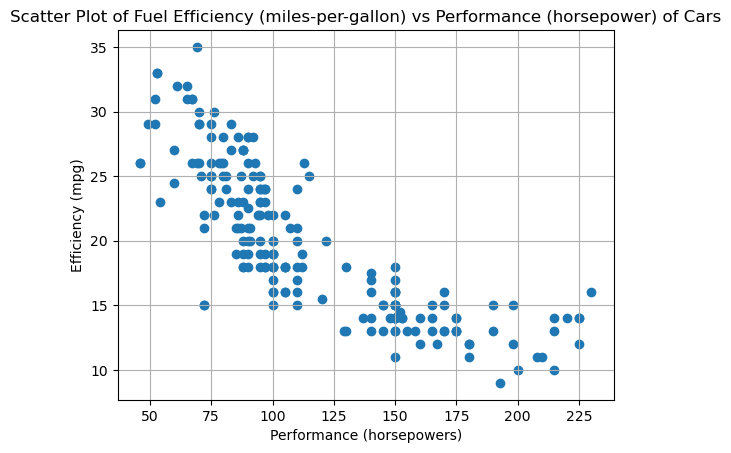

In [12]:
# This is how our first data looks like
plt.scatter(data['horsepower'], data['mpg'])
plt.title(f'Scatter Plot of Fuel Efficiency (miles-per-gallon) vs Performance (horsepower) of Cars')
plt.xlabel('Performance (horsepowers)')
plt.ylabel('Efficiency (mpg)')
plt.grid(True)
plt.show()

In [13]:
# Convert pandas dataframe to numpy array (matrix)
array_data = data.to_numpy()

### 1. Standardization

Using the original data, we standardize and center the data to normalize the different scales of data.Without standardization, variables with larger scales might dominate the principal components, and the results may be biased towards those variables. Also, it helps to improve numerical stability during the PCA computation. It helps avoid issues related to floating-point precision when dealing with variables of significantly different magnitudes.

The standardization can be done by this formula:
$$ x_{standard} = \dfrac {x - \bar x} {SD}   $$



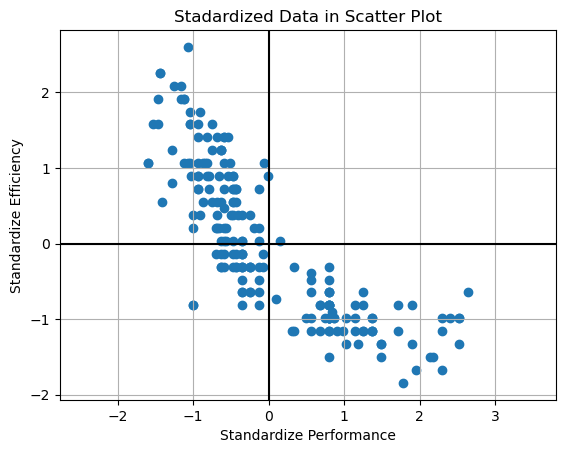

In [15]:
# Standardization and center data the data
array_data = preprocessing.scale(array_data)
plt.title(f'Stadardized Data in Scatter Plot')
plt.xlabel('Standardize Performance')
plt.ylabel('Standardize Efficiency')
plt.grid()
plt.axis('equal')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.scatter(array_data[:, 1], array_data[:, 0])

In [19]:
#PCA
pca = PCA(n_components=2, whiten=True)
pca.fit(array_data)

print("Covariant Matrix:",pca.get_covariance())
print("Component Vector (Eigenvector):",pca.components_)
print("Component Vector Weight (Eigenvalue):",pca.explained_variance_)
print("Captured Ratio:",sum(pca.explained_variance_ratio_))

Covariant Matrix: [[ 1.68516667 -1.65153631]
 [-1.65153631  1.68516667]]
Component Vector (Eigenvector): [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]
Component Vector Weight (Eigenvalue): [1.82666444 0.18338581]
Captured Ratio: 1.0


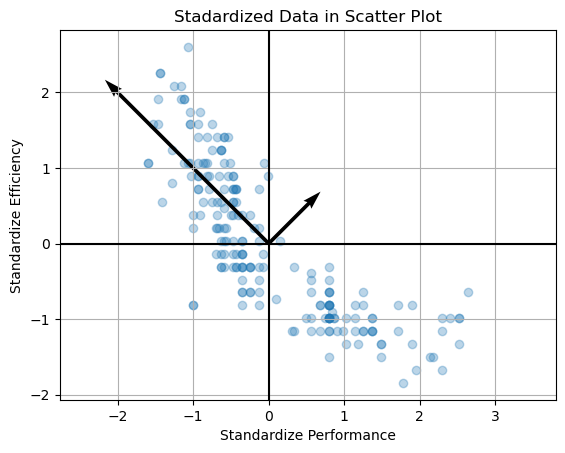

In [49]:
# plot data for eigenvector
plt.grid()
plt.title(f'Stadardized Data in Scatter Plot')
plt.xlabel('Standardize Performance')
plt.ylabel('Standardize Efficiency')
plt.axis('equal')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.scatter(array_data[:, 1], array_data[:, 0], alpha=0.3)
plt.quiver(0,0,pca.components_[0,0],pca.components_[0,1], scale= (5 * np.sqrt(pca.explained_variance_[1])))
plt.quiver(0,0,pca.components_[1,0],pca.components_[1,1], scale= (5 * np.sqrt(pca.explained_variance_[0])))

In [51]:
# Calculate PCA for dimension reduction
pca_new = PCA(n_components=1)
pca_new.fit(array_data)
array_data_pca = pca_new.transform(array_data)
array_data_new = pca_new.inverse_transform(array_data_pca)
print("Captured Ratio After Reduction:",sum(pca_new.explained_variance_ratio_))

Captured Ratio After Reduction: 0.9087655594767273


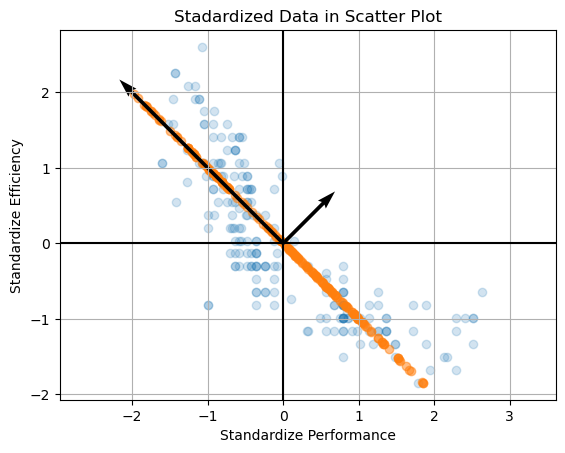

In [58]:
# plot all data
plt.title(f'Stadardized Data in Scatter Plot')
plt.xlabel('Standardize Performance')
plt.ylabel('Standardize Efficiency')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.scatter(array_data[:, 1], array_data[:, 0], alpha=0.2)
plt.scatter(array_data_new[:, 0], array_data_new[:, 1], alpha=0.5)
plt.quiver(0,0,pca.components_[0,0],pca.components_[0,1], scale= (5 * np.sqrt(pca.explained_variance_[1])))
plt.quiver(0,0,pca.components_[1,0],pca.components_[1,1], scale= (5 * np.sqrt(pca.explained_variance_[0])))
plt.axis('equal')
plt.grid()

(200, 2)


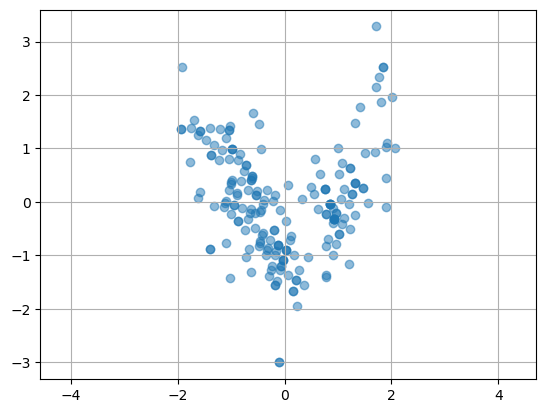

In [57]:
test = pca.transform(array_data)
plt.scatter(test[:,0], test[:,1], alpha=0.5)
plt.axhline(0, color='black')
plt.axis('equal')
plt.grid()